In [ ]:
!apt-get install -qq libgdal-dev libproj-dev
!pip install --no-binary shapely shapely --force
!pip install cartopy

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.8.5.post1.tar.gz (200 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669745 sha256=c925261737bda96c9874479767df56bd6c86426a22b953b82fe1a183e921ffbd
  Stored in directory: /root/.cache/pip/wheels/a3/07/7c/cc50e8ecc795963726466b22ecd395ee1e2a28da87a4cdeb56
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.5.post1
    Uninstalling Shapely-1.8.5.post1:
      Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cm
import numpy as np
import math as math
import scipy as stats
# import cartopy.crs as ccrs
# import cartopy.io.img_tiles as cio
# import cartopy.feature as cfeature 
import xarray as xr
import numpy.ma as ma
import datetime as dt
import seaborn as sns

In [2]:
#Primero: cargar el Drive:
from google.colab import drive
drive.mount('/content/Mdrive')
%cd /content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega6
! pwd

Mounted at /content/Mdrive
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega6
/content/Mdrive/MyDrive/TESIS/Analisis_Anual/Entrega6


In [3]:
df_stations = pd.read_excel('Libro_estaciones.xlsx',sheet_name='Estaciones')
df_stations = pd.DataFrame(df_stations)
df_stations

,Codigo,Estacion,Departamento,Municipio,Identificador,lat,lat_E,lon,lon_E
0,23215030,AGUAS CLARAS [23215030],Cesar,Aguachica,0,8.228889,8.25,-73.602778,-73.50
1,23155040,CENTRO EL [23155040],Santander,Barrancabermeja,0,6.859556,6.75,-73.765083,-73.75
2,21205710,JARDIN BOTANICO - AUT [21205710],Cundinamarca,Bogota,0,4.669333,4.75,-74.102667,-74.00
3,23195040,UNIVERSIDAD INDUSTRIAL SANTANDER [23195040],Santander,Bucaramanga,0,7.144722,7.25,-73.122222,-73.00
4,27045020,CASERI [27045020],Cauca,Cucasia,0,7.811722,7.75,-74.935972,-75.00
5,16015040,SANTA ISABEL [16015040],Norte_de_Santander,Cucuta,0,8.233333,8.25,-72.433333,-72.50
6,21205420,TIBAITATA [21205420],Cundinamarca,Mosquera,0,4.691417,4.75,-74.209000,-74.25
7,21135050,JULIA LA [21135050],Huila,Neiva,0,3.098778,3.00,-75.530028,-75.50
8,52055210,BOTANA - AUT [52055210],Nariño,Pasto,0,1.160000,1.25,-77.278806,-77.25
9,23095010,AEROPUERTO PUERTO BERRIO [23095010],Antioquia,Puerto_Berrio,0,6.465000,6.50,-74.412222,-74.50


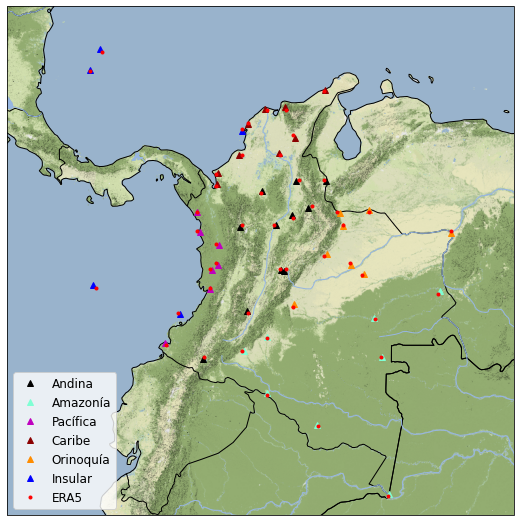

In [ ]:
#Definición del DF para cada Región Natural:
#Región Andina
andina = df_stations.loc[df_stations['Identificador']==0]
lat_andina,lon_andina = andina['lat'],andina['lon']

#Región Amazonía
amazonia = df_stations.loc[df_stations['Identificador']==1]
lat_amazonia,lon_amazonia = amazonia['lat'],amazonia['lon']

#Región Pacífica
pacifica = df_stations.loc[df_stations['Identificador']==2]
lat_pacifica,lon_pacifica = pacifica['lat'],pacifica['lon']

#Región Caribe
caribe = df_stations.loc[df_stations['Identificador']==3]
lat_caribe,lon_caribe = caribe['lat'],caribe['lon']

#Región Orinoquía
orinoquia = df_stations.loc[df_stations['Identificador']==4]
lat_orinoquia,lon_orinoquia = orinoquia['lat'],orinoquia['lon']

#Región Insular
insular = df_stations.loc[df_stations['Identificador']==5]
lat_insular,lon_insular = insular['lat'],insular['lon']


# descargar topografía y fronteras
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_image(tiler,9)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)

#Andina
ax.plot(lon_andina,lat_andina,'^',color='k',label='Andina',transform=ccrs.Geodetic())

#Amazonía
ax.plot(lon_amazonia,lat_amazonia,'^',color='aquamarine',label='Amazonía',transform=ccrs.Geodetic())

#Pacífica
ax.plot(lon_pacifica,lat_pacifica,'^',color='m',label='Pacífica',transform=ccrs.Geodetic())

#Caribe
ax.plot(lon_caribe,lat_caribe,'^',color='darkred',label='Caribe',transform=ccrs.Geodetic())

#Orinoquía
ax.plot(lon_orinoquia,lat_orinoquia,'^',color='darkorange',label='Orinoquía',transform=ccrs.Geodetic())

#Insular
ax.plot(lon_insular,lat_insular,'^',color='blue',label='Insular',transform=ccrs.Geodetic())


#Nearest point
ax.plot(df_stations['lon_E'],df_stations['lat_E'],'.r',label='ERA5',transform=ccrs.Geodetic())
plt.legend(loc=3, prop={'size': 12})
plt.show()

In [ ]:
#Mapa de diferencias en latitud y longitud:
dlat = df_stations['lat'] - df_stations['lat_E']
dlat = np.abs(dlat)
dlon = df_stations['lon'] - df_stations['lon_E']
dlon = np.abs(dlon)
diff = dlon+dlat
df_stations['diff'] = diff

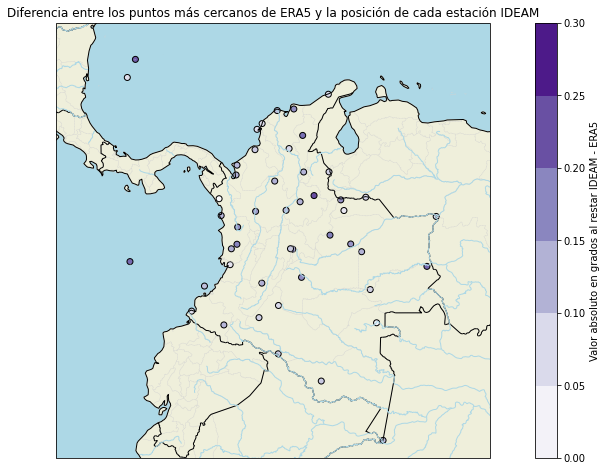

In [ ]:
#Mapa de diferencias en latitud y longitud:
dlat = df_stations['lat'] - df_stations['lat_E']
dlon = df_stations['lon'] - df_stations['lon_E']
diff = dlat + dlon
tiler = cio.Stamen('terrain-background')
bounds = [0,0.05,0.10,0.15,0.20,0.25,0.30]
#Descargas
countries = cfeature.NaturalEarthFeature(
    category='cultural',
    name = 'admin_0_boundary_lines_land',
    scale='10m',
    facecolor='none',
)
states = cfeature.NaturalEarthFeature(
    category='cultural',
    name = 'admin_1_states_provinces',
    scale='10m',
    facecolor='none',
)

rivers = cfeature.NaturalEarthFeature(
    'physical',
    'rivers_lake_centerlines',
    '10m',
)
proj = ccrs.Mercator()
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,1,1,projection=proj,adjustable='box')
ax1.set_extent([-85, -65, -5, 15])
ax1.add_feature(cfeature.OCEAN,color='lightblue')
ax1.add_feature(cfeature.LAND)
ax1.add_feature(states,edgecolor='lightgrey',linestyles='--',linewidth=0.3)
ax1.add_feature(countries,edgecolor='k')
ax1.add_feature(rivers,edgecolor='lightblue',facecolor='none')
ax1.coastlines(resolution='50m')
ax1.set_title('Diferencia entre los puntos más cercanos de ERA5 y la posición de cada estación IDEAM')
im1 = ax1.scatter(df_stations['lon'],df_stations['lat'],c=df_stations['diff'],vmin = 0, vmax = 0.3,transform=ccrs.Geodetic(),cmap='Purples',edgecolor='black')
plt.colorbar(im1,ax=ax1,boundaries=bounds,orientation='vertical',label='Valor absoluto en grados al restar IDEAM - ERA5',shrink=1)
plt.show()

#**Pearson Coefficient**

In [ ]:
df_stations = pd.read_excel('Libro_estaciones.xlsx',sheet_name='Correlaciones')
df_stations = pd.DataFrame(df_stations)
df_stations

,Codigo,Estacion,Departamento,Municipio,Identificador,lat,lon,corr_P,corr_Min,corr_Max
0,23215030,AGUAS CLARAS [23215030],Cesar,Providencia,5,13.359500,-81.357722,0.543211,NaN,NaN
1,23155040,CENTRO EL [23155040],Santander,San_Andrés,5,12.542183,-81.730969,0.621903,NaN,NaN
2,21205710,JARDIN BOTANICO - AUT [21205710],Cundinamarca,Manaure,3,11.781056,-72.463500,0.604046,NaN,NaN
3,23195040,UNIVERSIDAD INDUSTRIAL SANTANDER [23195040],Santander,Santa_Marta,3,11.111083,-74.054694,0.452149,NaN,NaN
4,27045020,CASERI [27045020],Cauca,Barranquilla,3,11.040000,-74.820833,0.626016,NaN,NaN
5,16015040,SANTA ISABEL [16015040],Norte_de_Santander,Cartagena_De_Indias,3,10.447222,-75.516111,0.645663,NaN,NaN
6,21205420,TIBAITATA [21205420],Cundinamarca,Cartagena_De_Indias,5,10.183333,-75.750000,0.447987,NaN,NaN
7,21135050,JULIA LA [21135050],Huila,Valledupar,3,9.904917,-73.647528,0.506847,NaN,NaN
8,52055210,BOTANA - AUT [52055210],Nariño,San_Sebastian_De_Buenavista,3,9.304056,-74.273639,0.045672,NaN,NaN
9,23095010,AEROPUERTO PUERTO BERRIO [23095010],Antioquia,Lorica,3,9.252722,-75.844417,0.425152,NaN,NaN


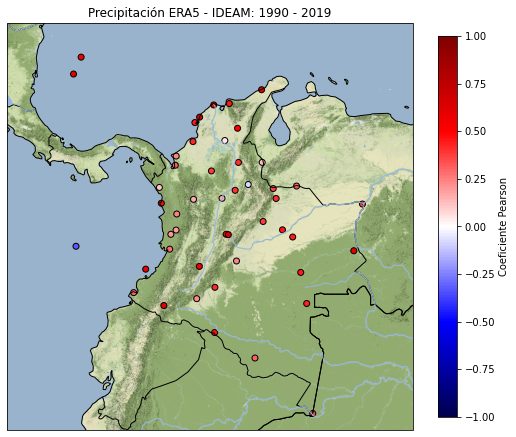

In [ ]:
# descargar topografía y fronteras
bounds = [-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,
          0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
tiler = cio.Stamen('terrain-background')

proj = ccrs.Mercator()
fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(121,projection=proj)
ax.set_extent([-85, -65, -5, 15])

# Adicionar topografía
ax.add_image(tiler,9)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.set_title('Precipitación ERA5 - IDEAM: 1990 - 2019')
im1 = ax.scatter(df_stations['lon'],df_stations['lat'],c=df_stations['corr_P'],vmin = -1, vmax = 1,transform=ccrs.Geodetic(),cmap='seismic',edgecolor='black')
plt.colorbar(im1,ax=ax,orientation='vertical',label='Coeficiente Pearson',shrink=0.35)
plt.show()

#**Tratamiento de los datos**

In [6]:
df = pd.read_excel('AguasClaras_1990-2019.xlsx',sheet_name='ERA5_T')
df

,ID,Tiempo,Valores
0,0,788928,22.281902
1,1,788929,21.678185
2,2,788930,20.969686
3,3,788931,20.873924
4,4,788932,20.519328
...,...,...,...
262963,262963,1051891,22.583674
262964,262964,1051892,23.832582
262965,262965,1051893,24.749793
262966,262966,1051894,24.240077


In [10]:
from datetime import datetime as dt
from datetime import timedelta as td

# Create the starting date as a `datetime` object.
start = dt(1990, 1, 1, 0, 0, 0)
# List initialiser.
result = [start]

# Build a list of datetime objects for each hour of the year.
for i in range(1, 262968):
    start += td(seconds=3600)
    result.append(start)

# Initialise a DataFrame data structure.
prueba = pd.DataFrame({'dates': result})
# Add each column by extracting the object of interest from the datetime.
df['Tiempo'] = prueba.index+1
df['Año'] = prueba['dates'].dt.year
df['Meses'] = prueba['dates'].dt.month
df['Dias'] = prueba['dates'].dt.day
df['Horas'] = prueba['dates'].dt.hour
df.drop(['Tiempo'],inplace=False,axis=1)
# Remove the datetime object column.
# df.drop(['dates'], inplace=True, axis=1)
df

,ID,Tiempo,Valores,Meses,Dias,Horas,Año
0,0,1,22.281902,1,1,0,1990
1,1,2,21.678185,1,1,1,1990
2,2,3,20.969686,1,1,2,1990
3,3,4,20.873924,1,1,3,1990
4,4,5,20.519328,1,1,4,1990
...,...,...,...,...,...,...,...
262963,262963,262964,22.583674,12,31,19,2019
262964,262964,262965,23.832582,12,31,20,2019
262965,262965,262966,24.749793,12,31,21,2019
262966,262966,262967,24.240077,12,31,22,2019


In [30]:
min = []
max = []
for i in df.groupby([('Año'),('Meses')])['Valores'].min():
  min.append(i)
for i in df.groupby([('Año'),('Meses')])['Valores'].max():
  max.append(i)
print(min)
print(max)

[18.198142974007396, 16.63958363236361, 20.09672639285742, 19.01281290592624, 19.209888085368334, 19.808052890576107, 18.977422644829232, 19.190458138099302, 19.181437091153043, 19.273035413992318, 18.946889870549512, 18.35080684540611, 18.35705218559974, 19.420147871885604, 20.262574871331537, 19.70604566741423, 19.98292241599654, 20.17444618193315, 19.914223673867014, 19.646367972231133, 19.523542948423938, 18.361215745728714, 19.368103370272422, 18.57563909237524, 17.944165806134947, 19.445823159348095, 20.106441366491936, 20.535981986472905, 20.37360314143973, 19.756008388962925, 18.139159205512442, 19.418066091821117, 18.817125579860544, 19.21127593874462, 19.42986284552012, 16.476510860642236, 17.911551251790627, 18.9586866242484, 19.72825132143595, 19.928102207630616, 19.38892117091774, 19.550606089262715, 18.76299929818282, 19.427087138767433, 18.849046207516608, 19.41390253169203, 19.493704100832304, 18.071154390071115, 17.382779115400297, 18.758835738053733, 18.55412736504183

In [38]:
from pandas.core.indexes.interval import date_range
Fecha = date_range('1990-01-01','2019-12-31',freq='M')
print(Fecha)

DatetimeIndex(['1990-01-31', '1990-02-28', '1990-03-31', '1990-04-30',
               '1990-05-31', '1990-06-30', '1990-07-31', '1990-08-31',
               '1990-09-30', '1990-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=360, freq='M')


In [39]:
dff = pd.DataFrame()
dff['Fecha'] = Fecha
dff['min'] = min
dff['max'] = max
dff['Estacion'] = nombre
display(dff)

,Fecha,min,max
0,1990-01-31,18.198143,29.226720
1,1990-02-28,16.639584,30.435540
2,1990-03-31,20.096726,31.194002
3,1990-04-30,19.012813,30.810954
4,1990-05-31,19.209888,29.409916
...,...,...,...
355,2019-08-31,18.708303,31.262058
356,2019-09-30,19.658892,30.500613
357,2019-10-31,18.829299,28.461749
358,2019-11-30,19.816744,30.427598


In [ ]:
def temperaturas(estacion):
  df = pd.read_excel(estacion,sheet_name='Precipitacion_Total_Mensual')
  nombre = df['Estacion'][0]
  df = pd.read_excel(estacion,sheet_name='ERA5_T')
  start = dt(1990, 1, 1, 0, 0, 0)
  result = [start]
  #Rango de horas
  for i in range(1, 262968):
      start += td(seconds=3600)
      result.append(start)

  #df de prueba
  prueba = pd.DataFrame({'dates': result})

  #Creación de las columnas del df transformado
  df['Tiempo'] = prueba.index+1
  df['Año'] = prueba['dates'].dt.year
  df['Meses'] = prueba['dates'].dt.month
  df['Dias'] = prueba['dates'].dt.day
  df['Horas'] = prueba['dates'].dt.hour
  df.drop(['Tiempo'],inplace=False,axis=1)

  #Creación de los groupby:
  min = []
  max = []
  for i in df.groupby([('Año'),('Meses')])['Valores'].min():
    min.append(i)
  for i in df.groupby([('Año'),('Meses')])['Valores'].max():
    max.append(i)

  #Creación del date_range:
  Fecha = date_range('1990-01-01','2019-12-31',freq='M')

  #Creación del nuevo dataframe:
  dff = pd.DataFrame()
  dff['Fecha'] = Fecha
  dff['min'] = min
  dff['max'] = max
  dff['Estacion'] = nombre

  #Paso a excel del nuevo df
  #dff.to_excel(nombre+'xlsx)